# <XPATH를 이용하여 크롤링하기>
XPATH: XML 문서의 특정 요소나 속성에 접근하기 위한 경로를 지정하는 언어  
xtml파일에서 특정 태그를 선택하는 여러 가지 방법 중 하나. xpath를 사용해서 특정 태그를 선택하는 문법을 배우려는 것.  
XML은 예전에 주로 많이 사용했던 문서 타입. 그때 당시 태그를 선택하는 기법이 xpath이고 요즘은 json형태의 데이터를 많이 쓴다.  
결국 기존 코드들 중 xpath를 기준으로 작성된 코드를 이해하고 사용할 수 있도록 하는 것이 목적.

사용할 사이트: https://news.v.daum.net/v/20200728171755863  
F12 개발자모드 > 코드 오른쪽 버튼 > Copy > Copy Xpath

### 1. 태그와 속성으로 선택하기

In [ ]:
crawling_data = soup.find('h1') #태그
crawling_data = soup.find(id='title') #id
crawling_data = soup.find('p', class_='cssstyle') #class이름
crawling_data = soup.find('p', attrs={'align':'center'}) #특정 태그의 특정 속성

In [ ]:
crawling_data= soup.find('html>title') #html태그의title
crawling_data= soup.find('div.article_view') #div태그의 class이름이 article_view인것
crawling_data= soup.find('#harmonyContainer') #태그 이름이 harmonyContainer
crawling_data= soup.find('div#mArticle div#harmonyContainer') #class들이 여러 개 섞여있을 때, 한 칸 띄어 표시하여 선택할 수 있다.

### 2. 그리고 XPath:참고  
BeautifulSoup에서는 지원하지 않음
Selenium과 Headless Chrome에서만 사용

/: 절대경로  
//: 문서내에서 검색  
//@href : href 속성이 있는 모든 태그 선택 (어떤 태그든 간에 ~속성이면 모두 선택) 
//a[@href='http://google.com'] : a 태그의 href 속성에 속성값이 http://google.com 인 모든 태그 선택  
(//a)[3] : 문서의 세 번째 링크 선택(세 번째 a태그 선택)  
(//table)[last()] : 문서의 마지막 테이블 선택  
(//a)[position() < 3] : 문서의 처음 두 링크 (첫 두 a태그 선택) 선택  
//table/tr/* 모든 테이블에서 모든 자식 tr 태그 선택  
//div[@*] 속성이 하나라도 있는 div 태그 선택  

세부 문법: https://wkdtjsgur100.github.io/selenium-xpath/

In [5]:
#기사에서 xpath사용하여 title 가지고 오기
from selenium import webdriver
headless_options = webdriver.ChromeOptions()
headless_options.add_argument('headless')

headless_options.add_argument('headless') 
headless_options.add_argument('window-size=1920x1080')
headless_options.add_argument("lang=ko_KR")
headless_options.add_argument("disable-gpu")
chromedriver = 'C:\\Users\\lovel\\Anaconda3\\Lib\\site-packages\\selenium\\webdriver\\chrome\\chromedriver.exe'
driver = webdriver.Chrome(chromedriver, options=headless_options)

driver.get('https://news.v.daum.net/v/20200728171755863')
title = driver.find_element_by_xpath('//*[@id="cSub"]/div/h3') # 어디에서나 id가 cSub인 태그를 찾아서, 그 div안의 h3를 찾은 셈.
print (title.text) # head 태그 안에 있는 title 정보는 title이 아니라 get_attribute('text') 메서드로 추출할 수 있다.
driver.quit()

파우치 "백신개발 이르면 10월 가능..안전성 우려 안해"


In [ ]:
# 문서 내 태그 검색
title = driver.find_element_by_xpath("//title") # 문서내의 어떤 태그든지 가능

# 절대경로
title = driver.find_element_by_xpath("/html/head/title") #html태그 안의 head,body 중 body에 있는 title찾는 것을 의미

# html 태그 내에서 다시 검색
title = driver.find_element_by_xpath("/html//title") #html태그 안의 모든 태그 중, title태그를 찾아라

# soup.find('h3', attrs = {'class' : 'tit_s'})
title_content = driver.find_element_by_xpath("//h3[@class='tit_view']") 
#어떤 태그든, 전체 html문서에서 h3태그를 찾는데, 그 h3태그의 class가 tit_view인 태그를 찾아라.

## XPATH와 Selenium 활용해서 페이스북 로그인하기

In [11]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

chromedriver = 'C:\\Users\\lovel\\Anaconda3\\Lib\\site-packages\\selenium\\webdriver\\chrome\\chromedriver.exe'
driver = webdriver.Chrome(chromedriver)
driver.get('https://www.facebook.com/')

In [15]:
user_name= '~~~@gmail.com'
password= '12345'

#아이디 입력란, 비밀번호 입력란, 로그인 버튼 모두 XPATH로 가져와보겠다.
email_x= "//*[@id='email']"
password_x= "//*[@id='pass']"
login_button_x= "//*[@id='u_0_e']"

email_tag=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, email_x)))
password_tag=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, password_x)))
login_button_tag=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, login_button_x)))

email_tag.clear()
email_tag.send_keys(user_name)
password_tag.clear()
password_tag.send_keys(password)
login_button_tag.click()

import time
time.sleep(5)
driver.quit()

## XPATH와 Selenium활용해서 seeko 기사 가져오기
제목과 조회수, 게시 날짜를 최신 순 10개 가져오기  

오류 주의: 태그가 숨겨져 있음
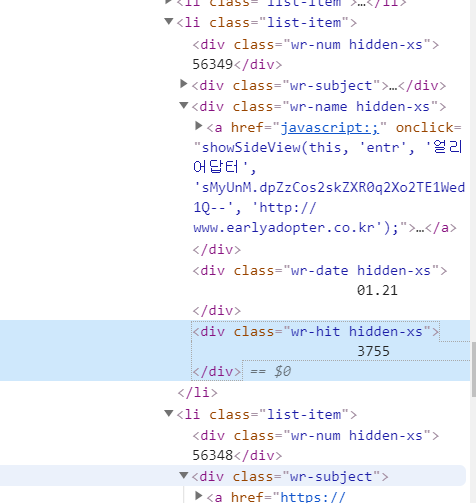

In [57]:
from selenium import webdriver
driver=webdriver.Chrome('C:\\Users\\lovel\\Anaconda3\\Lib\\site-packages\\selenium\\webdriver\\chrome\\chromedriver.exe')
driver.get('https://seeko.earlyadopter.co.kr/bbs/board.php?bo_table=mainnews')

article_data = list() #list데이터를 만들고, 여기에 title과 조회수에 해당하는 값을 가져와보겠다
#xpath가 부적절해 보이면, 페이지의 원하는 요소의 소스를 보고 직접 xpath를 만들어 쓸 필요가 있다.
titles= driver.find_elements_by_xpath("//a[@class='item-subject']") 
hits= driver.find_elements_by_xpath("//div[@class='wr-hit hidden-xs']")
dates= driver.find_elements_by_xpath("//div[@class='wr-date hidden-xs']")

for num in range(10):
    article_data.append([titles[num].text, hits[num].text, dates[num].text]) #해당 번호에 해당하는 제목과 조회수를 텍스트로
    
print(article_data)

[['탄소 발자국을 줄이는 나이키 신발 5', '5191', '02.14'], ['한 번 가볼 텐가? 텐가 팝업스토어 1', '4556', '02.14'], ['메가박스는 계획이 다 있구나 : 기생충 스페셜 오리지널 티켓', '4038', '02.14'], ['구글 지도에서 교통 정체를 직접 컨트롤하는 방법?!', '3910', '02.07'], ['그래픽 전문가를 위한 게이밍 노트북 RAZER BLADE 15 STUDIO EDITION', '3945', '02.05'], ['말귀를 알아듣는 로봇청소기 LG 코드제로 씽큐 R9 보이스', '3713', '02.05'], ['우주에서 날아온 듯한 뱅앤올룹슨 스타더스트 블루 한정판', '4245', '02.03'], ['블루투스 추적기 치폴로 원', '3645', '01.22'], ['지문으로 보안 강화시킨 삼성 T7 터치', '3756', '01.21'], ['Wi-Fi 6와 Mesh로 무장한 프리미엄 공유기 : 벨롭 MX5300 1', '3746', '01.21']]


# <Scrapy로 크롤링하기>

처음에는 난해하지만, 사용법을 알면 BeautifulSoup 라이브러리보다 편함  
대표적인 크롤링 프레임워크로 상세 사용법은 책 한 권  
하지만, 간단하게는 바로 사용할만 함

1. Scrapy는 python의 프레임워크  

프레임워크:  
 * 일종의 함수와 코드를 미리 작성해놓은 것  
 * 특정 함수를 특정 위치에 어떻게 사용/작성해야 하는지를 정해놓은 프로그램

2. Scrapy가 가지는 장점  
1) 크롤링을 좀 더 안정적으로 할 수 있음  
2) 크롤링을 좀 더 빠르게 할 수 있음  
3) 다양한 크롤링 관련 기능

3. 사용 방법<br>
1) 실제 크릴링할 스파이더(spyder, scrapy 기반 크롤링 프로그램) 생성<br>
2) 크롤링할 사이트(시작점)와 크롤링할 아이템(item)에 대한 selector 설정<br>
3) 크롤러 실행

## 1. Scrapy 설치
<br>
윈도우/맥 공통

In [3]:
pip install scrapy

  Stored in directory: C:\Users\lovel\AppData\Local\pip\Cache\wheels\51\01\d1\4a2286a976dccd025ba679acacfe37320540df0f2283ecab12
  Stored in directory: C:\Users\lovel\AppData\Local\pip\Cache\wheels\88\99\96\cfef6665f9cb1522ee6757ae5955feedf2fe25f1737f91fa7f
Successfully built protego PyDispatcher
  Found existing installation: attrs 19.1.0
    Uninstalling attrs-19.1.0:
      Successfully uninstalled attrs-19.1.0
Note: you may need to restart the kernel to use updated packages.


윈도우에서 정상 설치가 안 될 시, 다음 코드 실행 시도

In [ ]:
pip install --upgrade setuptools
pip install pypiwin32
pip install twisted[tls]

그래도 안된다면?

In [ ]:
https://visualstudio.microsoft.com/ko/downloads/
    #visualstudio를 설치한 후 위 코드를 다시 실행해보자

## 2. 크롤링 프로젝트 생성
1) 터미널 오픈<br>
터미널: 키보드로 명령을 내릴 수 있는 프로그램<br>
<br>
오픈 방법: 
* (맥)기타 부분에서 찾아서 열기 or iTerm2프로그램 다운
* (윈도우)cmd 검색하여 사용하여 명령 프롬프트 열기 or 아나콘다 프롬프트 사용

2) 터미널 환경에서 프로젝트 만들기
원하는 경로로 들어가기 (cd 사용)  
scrapy startproject <프로젝트이름>으로 생성

In [ ]:
scrapy startproject ecommerce

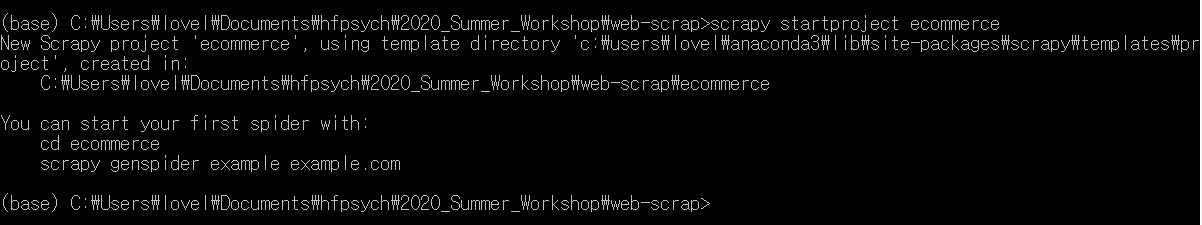

In [ ]:
cd ecommerce #만들어진 ecommerce폴더로 들어가기

* Sublime Text 3 사용, 템플릿 확인하기<br>
설치: https://www.sublimetext.com/3 <br>
Sublime Text 3를 열고, (윈도우) File > Open Folder > 방금 만든 ecommerce폴더 선택 (맥)그냥 해당 폴더 오픈 <br>
<br>
ecommerce안의 또다른 ecommerce폴더를 클릭하면, 코드파일들이 나온다. 이러한 코드파일들이 바로 템플릿임. 미리 작성된 코드를 기반으로 프로젝트가 만들어진 것.

## 3. 크롤러(spider)작성
Scrapy에서는 크롤러 프로그램을 spider라고 부른다.  
내가 크롤링할 주소와 함께 sipder프로그램을 작성하면 크롤링이 실행되는 것  
<br>
1) 터미널을 이용하여 ecommerce > ecommerce폴더에서 다음 명령으로 작성 가능

In [ ]:
scrapy genspider <크롤러이름> <크롤링페이지주소>
#http나 https, 앞뒤에 붙는 슬래시 등은 삭제해주고 메인 주소만 명령에 작성해주는 게 오류를 방지
scrapy genspider gmarket www.gmarket.co.kr 

Sublime Text 3에서 확인해 보면, spider폴더 안에 gmarket을 이름으로 하는 코드파일이 생성되어 있는 것을 확인 가능
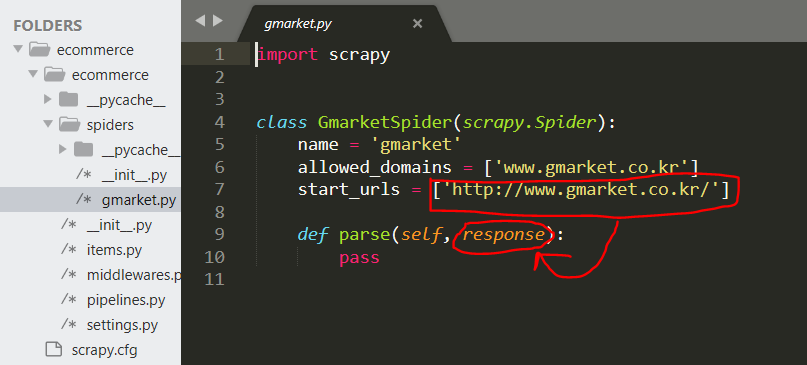

2) start_urls에 저장된 주소의 html파일을 response라는 변수에 저장.
코드의 맨 마지막 줄에 있는 pass를 지우고, print(response.text)로 바꾸어 써서 저장한다(해당 html소스가 표시되도록 하는 것: 결과 확인 위해서)
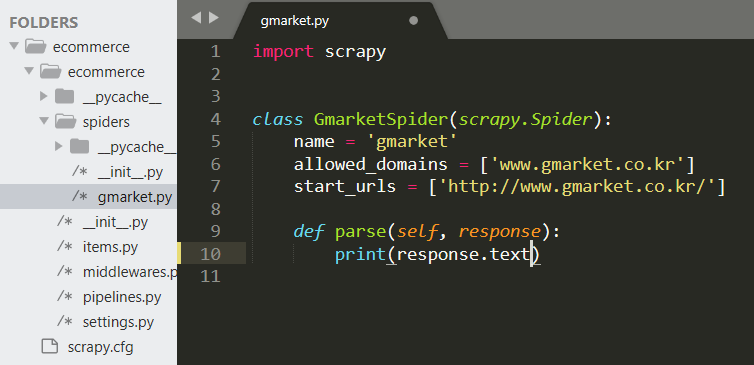

3) 다시 명령 프롬프트로 돌아가서 명령어 입력(아까 진입했던 directory 그대로, ecommerce>ecommerce 디렉토리에서)

In [1]:
scrapy crawl gmarket

SyntaxError: invalid syntax (<ipython-input-1-ea23189a593a>, line 2)

4) gmarket.py 로 보는 기본 템플릿 구조: 객체 지향으로 작성되어 있음<br>
(파이썬 객체지향 프로그래밍을 이해하시면, 조금더 코드 이해 및 작성이 빠를 수 있음)  
<br>
spider는 GmarketSpider라는 이름을 가진 class의 형태로 작성이 되었고,
scrapy crawl이란 명령을 내리면 해당 프로젝트의 클래스(GmarketSpider)가 객체로 만들어지면서 start_urls에 있는 주소에 있는 html을 가지고와서 밑에 있는 함수(parse)를 호출. 이때 response에 가져온 html을 저장.  

* 클래스 이름은 마음대로 정하면 됨, 단 scrapy.Spider 를 상속받아야 함
* name이 크롤러(spider)의 이름
* allowed_domains는 옵션(삭제해도 무방): 별도 상세 설정으로 허용된 주소(allowed_domains에 입력된 주소) 외의 주소는 크롤링 못하게끔 하기 위한 변수
* start_urls 가 중요함. 크롤링할 페이지 주소를 나타냄: list형태이기 때문에 여러 개의 주소를 넣을 수도 있음.
 * start_urls에서 주소를 하나씩 가져와서 크롤링한 후,
 * response 에 넣고, parse 함수를 호출함
 * parse 함수에 response에 담아져있는 크롤링 결과를 원하는 대로 처리하면 됨
* parse 함수는 클래스의 메서드로 response를 반드시 인자로 받아야 함
( response에 start_urls 에 기록된 주소의 크롤링 결과가 담아져오기 때문임<br>
<br>
코드를 어느 정도 이해하면, 코드를 변형시켜서 원하는 방법 대로 사용할 수 있음. 코드를 수정했을 때 에러가 나타난다면 indentation등을 확인하라.

## Scrapy 연습: Response 사용법 이해 (Scrapy Shell)
Shell: 터미널 모드에서 쥬피터 노트북과 같은 인터페이스 제공<br>
터미널에서 아래 코드 입력

In [2]:
scrapy shell "https://www.gmarket.co.kr/"

SyntaxError: invalid syntax (<ipython-input-2-6f74d700e81f>, line 1)

위 코드를 실행하게 되면, 입력한 주소의 html파일을 가져와서 명령을 기다리는 상태가 됨
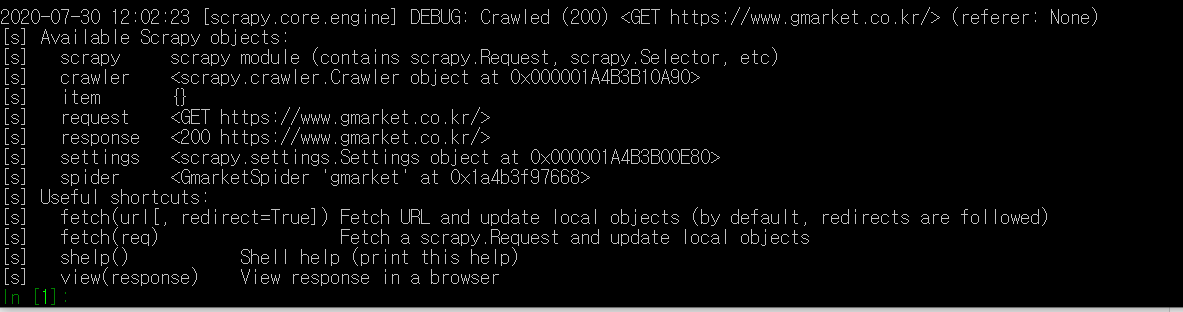

[1]위에 있는 것들이 사용 가능한 명령들의 리스트. <br>
혹은 shelp()를 입력하면 명령들의 리스트를 다시 출력할 수 있다.

In [ ]:
view(response) #크롤링한 페이지를 웹브라우저를 통해 확인하기
response.url #크롤링한 페이지 주소 확인
response.text #프롬프트에 가져온 html을 텍스트로 출력

response.css(): css selector 로 데이터 가져오기

In [ ]:
response.css('head > title').get() #텍스트&태그 가져오기
response.css('head > title').getall()
response.css('head > title::text').get() #태그는 빼고, 텍스트만 가져오기

In [ ]:
# gmarket 메인에 노출된 카테고리 가져오기
response.css('span.link__1depth-item::text').getall() #span태그 중 'link__1depth-item'클래스를 가진 것들의 text만 출력해라

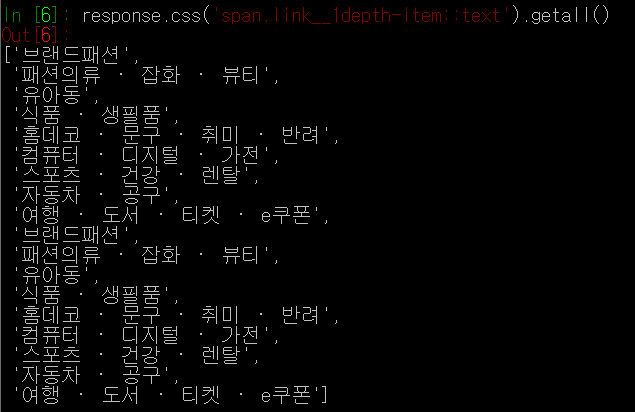

In [ ]:
#gmarket 메인에 노출된 카테고리 중 특정 순번에 있는 텍스트만 가져오기
response.css('span.link__1depth-item::text')[2].get()

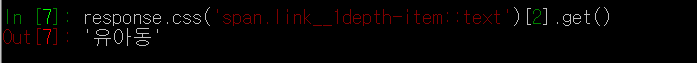

response.xpath(): xpath 로 데이터 가져오기

In [ ]:
#css selector로부터 xpath 직접 작성: //span[@class='link__1depth-item']
response.xpath("//span[@class='link__1depth-item']").getall() #태그와 텍스트 모두 출력
response.xpath("//span[@class='link__1depth-item']/text()").getall() #텍스트만 출력

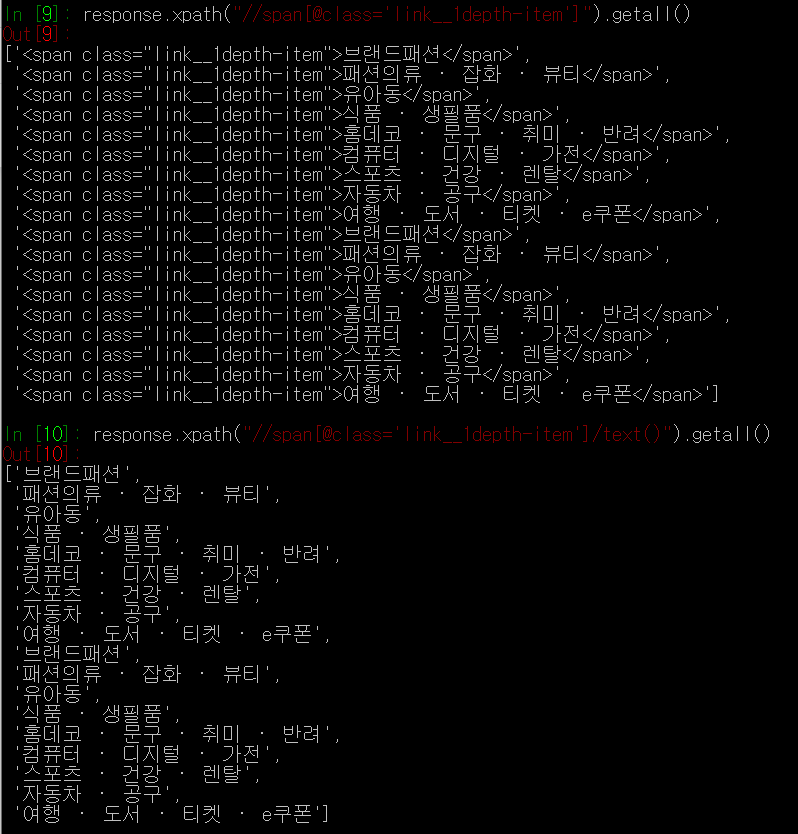